<a href="https://colab.research.google.com/github/Rafae1040/Credit-SQL/blob/main/Projeto_Final_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploração e análise de dados de crédito com SQL


**Os dados:**
As informações dos clientes de um banco estão registradas em dados que contêm as seguintes colunas:

* idade = idade do clientes
* sexo = sexo do cliente (F ou M)
* dependentes = número de dependentes do cliente
* escolaridade = nível de escolaridade do clientes
* salario_anual = faixa salarial do cliente
* tipo_cartao = tipo de cartao do cliente
* qtd_produtos = quantidade de produtos comprados nos últimos 12 meses
* iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses
* meses_inativo_12m = quantidade de meses que o cliente ficou inativo
* limite_credito = limite de credito do cliente
* valor_transacoes_12m = valor das transações dos ultimos 12 meses
* qtd_transacoes_12m = quantidade de transacoes dos ultimos 12 meses

A tabela foi criada no AWS Athena junto com o S3 Bucket com uma versão dos dados disponibilizados em: https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset





#Exploração de Dados:
A primeira fase da análise é entender os dados que temos à disposição. Vamos realizar a exploração dos dados:


**Qual a quantidade de informações temos na nossa base de dados?**



---



Query SELECT count(*) FROM credito

Resposta: 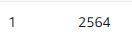



**PSC**: A base de dados no link fornecido contém mais linhas do que aquelas selecionadas para esta análise. É possível utilizar todas as linhas disponíveis ou optar por uma fração dos dados, dependendo das limitações computacionais e financeiras. Em geral, quanto maior a quantidade de dados utilizados, mais confiável será a análise realizada. No entanto, é importante ponderar esses fatores e reduzir o tamanho da amostra quando necessário para fins de estudo.






**Caracteristicas dos dados**



---



Query: SELECT * FROM credito LIMIT 10;

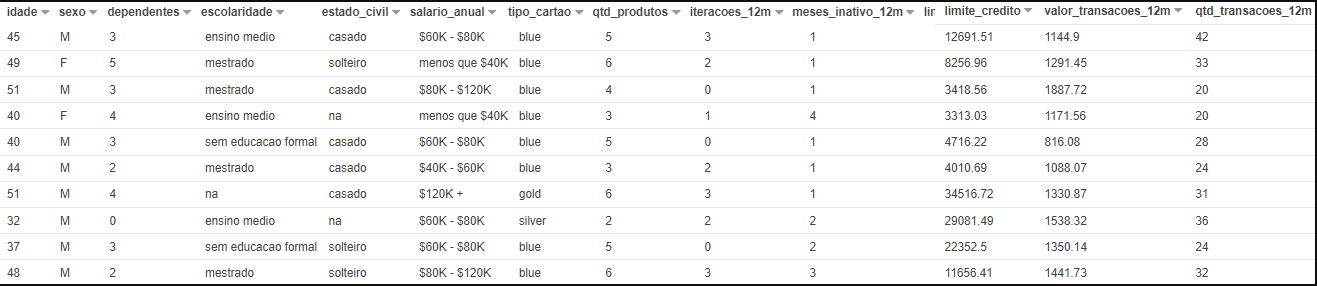

É possível reparar que existem algumas informações nulas na tabela (valor na), vamos olhar mais de perto para os valores de cada coluna.



**Quais são os tipos de dados e suas respectivas categorias?**



---



Query: DESCRIBE credito

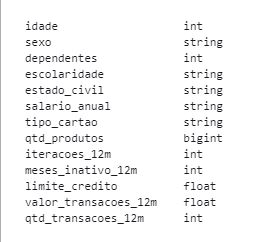


Agora que compreendemos os diferentes tipos de dados, podemos examinar com mais detalhes as variáveis que não possuem valores numéricos.




**Quais são os tipos de estado_civil disponíveis no dataset?**


---



Query: SELECT DISTINCT estado_civil FROM credito

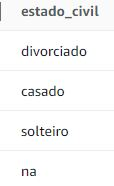

Pode-se notar que temos valores nulos(na) no dataset e adiante trataremos.





#Analise de Dados

Uma vez que tenhamos examinado os dados e adquirido uma compreensão mais profunda das informações contidas no conjunto de dados, podemos proceder com a realização de análises a fim de obter uma melhor compreensão do que está acontecendo.

**Query:** select count(*), salario_anual from credito group by salario_anual

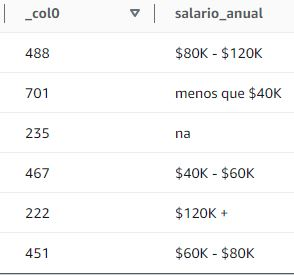

**Qual é a contagem de clientes em cada faixa salarial no banco de dados?**



---



A base de dados indica que a maioria dos clientes possui renda inferior a 40K e que há um total de 235 clientes cuja faixa salarial não foi informada ou não consta no banco de dados. Diante desses dados, pode ser vantajoso para a empresa direcionar seus esforços para atender a esse público de menor renda.

**No banco de dados, quantos clientes são homens e quantos são mulheres?**


---


**Query:** select count(*), sexo from credito group by sexo

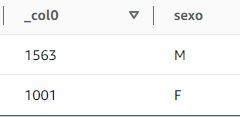


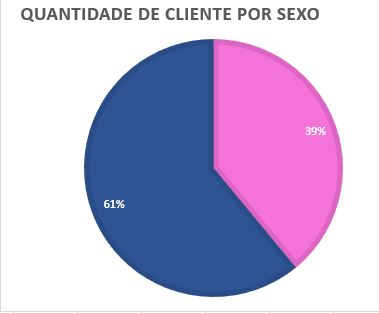

Com base no arquivo CSV dos dados, é possível criar um gráfico de pizza para visualizar a proporção de clientes masculinos e femininos, mostrando que a maioria dos clientes do banco são homens.



**Quais as características dos clientes na quantidade de transacoes dos ultimos 12 meses?**


---


**Query:** select max(limite_credito) as limite_credito, estado_civil, tipo_cartao, sexo, qtd_transacoes_12m from credito
where estado_civil != 'na' and tipo_cartao != 'na'
group by estado_civil, tipo_cartao, sexo, qtd_transacoes_12m
order by limite_credito desc
limit 10

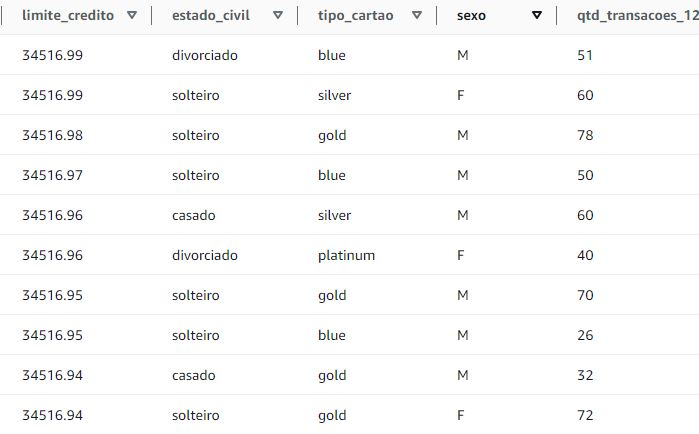

No banco de dados podemos notar que a maior quantidade de transação foi de um cliente que seu limite de credito nao é o maior, o tipo de cartão é o gold e o estado civil é solteiro. Assim há uma probabilidade que podemos ofertar um maior limite, para que possa atender as necessidades do cliente.

**As mulheres compram mais que os homens?**



---



**Query:** select max(qtd_transacoes_12m) as maior_valor_gasto, avg(qtd_transacoes_12m) as media_valor_gasto, min(qtd_transacoes_12m) as min_valor_gasto, sexo
from credito
group by sexo

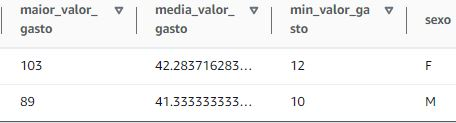

Os gastos de homens e mulheres são similares.

**Quais caracteristicas dos clientes que compraram produtos nos ultimos 12 meses?**

**Query:** select avg(valor_transacoes_12m) as qts_produtos, avg(qtd_produtos) as media_valor_transacoes, avg(limite_credito) as media_limite, sexo, salario_anual
from credito
where salario_anual != 'na'
group by sexo, salario_anual
order by avg(qtd_produtos) desc

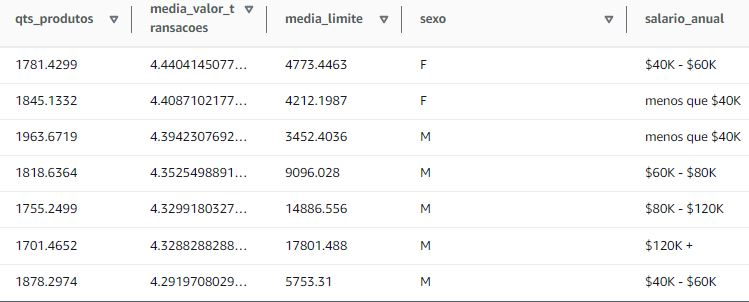

O clientes que ganham menos de 40k é os que compram mais produtos, durante os 12 meses

#Conclusão


---


**Essas foram algumas análises extraídas do dataset de crédito.**

**Alguns insights interessantes:**

* a maior parte dos clientes possui renda até 40K
* os clientes com maiores limites são em sua maioria homens e divorciados
* os clientes com menores limites são em sua maioria mulheres e solteiras
* os clientes com menores transacoes os que usam cartão platinum
* O limite de crédito é diretamente afetado pela faixa salarial do cliente.
* Não há clientes do sexo feminino com renda anual acima de 60 mil.
